$$ \frac{\partial}{\partial t} \left( \nabla^2 \psi \right) + \det \left[ \frac{\partial   \left(\psi, \nabla^2 \psi \right) }{\partial (y, x)} \right] = \nu \nabla^4 \psi $$

$$ \frac{\partial}{\partial t} \left( - \omega \right) + \det \left[ \frac{\partial \left(\psi, - \omega \right) }{\partial (y, x)} \right] = \nu \nabla^2 (- \omega) $$

$$ - \frac{\partial \omega}{\partial t} + \det \begin{bmatrix} \dfrac{\partial \psi}{\partial y} & \dfrac{\partial \psi}{\partial x} \\ \\ \dfrac{\partial (- \omega)}{\partial y} & \dfrac{\partial (-\omega)}{\partial x} \end{bmatrix} = - \nu \nabla^2 \omega $$

$$ - \frac{\partial \omega}{\partial t} + \left[ \left( \frac{\partial \psi}{\partial y} \right) \left(- \frac{\partial \omega}{\partial x} \right) - \left( \frac{\partial \psi}{\partial x} \right) \left(- \frac{\partial \omega}{\partial y} \right) \right] = - \nu \nabla^2 \omega $$

$$ - \omega_t - u \cdot \omega_x - v \cdot \omega_y = - \nu  \nabla^2 \omega $$

$$ \Omega_t = \nu \nabla^2 \Omega - \mathcal{F} \left[ u \cdot \omega_x + v \cdot \omega_y \right] = \nu \nabla^2 \Omega + \mathcal{F} \left| \mathbf{J}_{\psi, \omega} \right|$$ 

To test that the `recover_u(Psi)` function is working as intended:

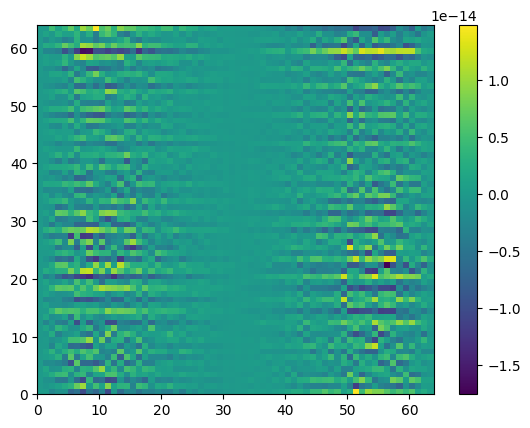

In [39]:
import numpy as np
from numpy import pi
from numpy.fft import fft2, ifft2
import matplotlib.pyplot as plt

def wavenumbers(N, dom):
    return np.array(list(range(0, N//2 + 1)) + list(range(- N//2 + 1, 0))) * 2 * np.pi / (dom[1] - dom[0])

# computational grid parameters
M, N = 64, 64
x_dom, y_dom = [0, 2 * pi], [0, 2 * pi]
x = np.linspace(x_dom[0], x_dom[1], M, endpoint = False)
y = np.linspace(y_dom[0], y_dom[1], N, endpoint = False)
dx, dy = x[1] - x[0], y[1] - y[0]
kx, ky = wavenumbers(M, x_dom), wavenumbers(N, y_dom)

def recover_u(Psi):
    U = np.empty(shape = (M, N), dtype = 'complex') # frequency velocity x-component
    
    for p in range(0, M):
        for q in range(0, N):
            U[p, q] = + 1j * ky[q] * Psi[p, q]
    
    u = ifft2(U) # physical velocity x-component
    return u


psi = np.empty(shape = (M, N))
for i in range(0, M):
    for j in range(0, N):
        psi[i, j] = np.sin(x[i]) * np.cos(y[j]) * np.exp(np.cos(x[i]) + np.sin(y[j]))
        # psi[i, j] = np.sin(x[i]) * np.cos(y[j])
        # psi[i, j] = np.sin(x[i]) * np.exp(np.cos(y[j]))

Psi = fft2(psi)

u_num = recover_u(Psi)
u_ana = np.empty(shape = (M, N))
for i in range(0, M):
    for j in range(0, N):
        u_ana[i, j] = np.sin(x[i]) * (np.cos(y[j]) ** 2 - np.sin(y[j])) * np.exp(np.cos(x[i]) + np.sin(y[j]))
        # u_ana[i, j] = - np.sin(x[i]) * np.sin(y[j])
        # u_ana[i, j] = - np.exp(np.cos(y[j])) * np.sin(x[i]) * np.sin(y[j])

plt.pcolor(np.real(np.transpose(u_num - u_ana)))
plt.colorbar()
plt.show()